In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import json

In [ ]:
dataset = pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

In [ ]:
dataset.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,2020-01-30,1,1,0,0,0,0
1,31 January,2020-01-31,0,1,0,0,0,0
2,01 February,2020-02-01,0,1,0,0,0,0
3,02 February,2020-02-02,1,2,0,0,0,0
4,03 February,2020-02-03,1,3,0,0,0,0


In [ ]:
dataset['Date_YMD']=pd.to_datetime(dataset['Date_YMD'])

In [ ]:
dataset.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,2020-01-30,1,1,0,0,0,0
1,31 January,2020-01-31,0,1,0,0,0,0
2,01 February,2020-02-01,0,1,0,0,0,0
3,02 February,2020-02-02,1,2,0,0,0,0
4,03 February,2020-02-03,1,3,0,0,0,0


In [ ]:
dataset['active']=dataset['Total Confirmed']-dataset['Total Recovered']-dataset['Total Deceased']

In [ ]:
df=dataset[['Date_YMD','Total Confirmed','Total Recovered','Total Deceased','active']]
df.head()

,Date_YMD,Total Confirmed,Total Recovered,Total Deceased,active
0,2020-01-30,1,0,0,1
1,2020-01-31,1,0,0,1
2,2020-02-01,1,0,0,1
3,2020-02-02,2,0,0,2
4,2020-02-03,3,0,0,3


In [ ]:
df.tail()

,Date_YMD,Total Confirmed,Total Recovered,Total Deceased,active
334,2020-12-29,10245263,9833189,147884,264190
335,2020-12-30,10267208,9859596,148183,259429
336,2020-12-31,10286253,9881619,148427,256207
337,2021-01-01,10306411,9905457,148664,252290
338,2021-01-02,10324536,9926306,148880,249350


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_YMD         339 non-null    datetime64[ns]
 1   Total Confirmed  339 non-null    int64         
 2   Total Recovered  339 non-null    int64         
 3   Total Deceased   339 non-null    int64         
 4   active           339 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 13.4 KB


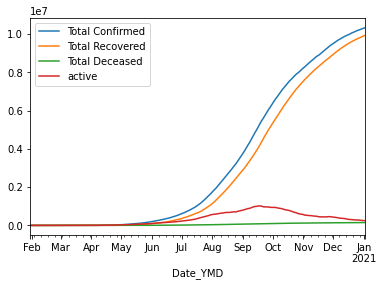

In [ ]:
df.plot(x='Date_YMD')

In [ ]:
# Time series forecasting
import fbprophet

In [ ]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [ ]:
from fbprophet import Prophet
model = Prophet()

In [ ]:
# Add seasonality
model.add_seasonality(name='Monthly', period=30.42, fourier_order=5)

In [ ]:
global_cases = df.reset_index()
confirmed_df = global_cases[['Date_YMD', 'Total Confirmed']]
recovered_df = global_cases[['Date_YMD', 'Total Recovered']]
deaths_df = global_cases[['Date_YMD', 'Total Deceased']]

In [ ]:


# For Prophet to predict, its required for the names on the variables to be ds and y
def rename_func(dataframe):
    cols = dataframe.columns
    dataframe.rename(columns= {cols[0]: 'ds', cols[1]:'y'}, inplace= True)
    return dataframe



In [ ]:


confirmed_df = rename_func(confirmed_df)
recovered_df = rename_func(recovered_df)
deaths_df = rename_func(deaths_df)



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
confirmed_df.head()

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3


In [ ]:
def train_test_split(dataframe, ratio):
    """
    Parameters:
    dataframe- Dataframe required to be split
    ratio: Percentage of training split in the scale of 0-100
    """
    divisor = round((ratio/100)*dataframe.shape[0])
    print(divisor)
    train = dataframe.iloc[:divisor]
    test = dataframe.iloc[divisor:]
    return train, test

In [ ]:
confirmed_df.shape

(339, 2)

In [ ]:
confirmed_train, confirmed_test = train_test_split(confirmed_df, 70)

237


In [ ]:
confirmed_train

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3
...,...,...
232,2020-09-18,5305665
233,2020-09-19,5398239
234,2020-09-20,5485634
235,2020-09-21,5560127


In [ ]:
confirmed_train.shape, confirmed_test.shape

((237, 2), (102, 2))

In [ ]:
confirmed_test.head()

,ds,y
237,2020-09-23,5730192
238,2020-09-24,5816113
239,2020-09-25,5901830
240,2020-09-26,5990589
241,2020-09-27,6073359


In [ ]:


# Fitting model
model.fit(confirmed_train)



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Creating future dates
future_dates = model.make_future_dataframe(periods=100)

In [ ]:
future_dates

,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
...,...
332,2020-12-27
333,2020-12-28
334,2020-12-29
335,2020-12-30


In [ ]:
predictions = model.predict(future_dates)

In [ ]:
predictions.shape

(337, 19)

In [ ]:
x= predictions.iloc[236:]
x.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Monthly,Monthly_lower,Monthly_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
332,2020-12-27,1.274292e+07,1.186012e+07,1.366031e+07,1.186900e+07,1.367847e+07,-15148.425890,-15148.425890,-15148.425890,-12939.572413,-12939.572413,-12939.572413,2208.853477,2208.853477,2208.853477,0.0,0.0,0.0,1.272998e+07
333,2020-12-28,1.281863e+07,1.191225e+07,1.375700e+07,1.193393e+07,1.376717e+07,-11537.281283,-11537.281283,-11537.281283,-10907.327481,-10907.327481,-10907.327481,629.953802,629.953802,629.953802,0.0,0.0,0.0,1.280772e+07
334,2020-12-29,1.289434e+07,1.198355e+07,1.385823e+07,1.199045e+07,1.385527e+07,-9469.924712,-9469.924712,-9469.924712,-8566.305447,-8566.305447,-8566.305447,903.619265,903.619265,903.619265,0.0,0.0,0.0,1.288577e+07
335,2020-12-30,1.297004e+07,1.204929e+07,1.395083e+07,1.205459e+07,1.394362e+07,-8660.789106,-8660.789106,-8660.789106,-11471.646686,-11471.646686,-11471.646686,-2810.857580,-2810.857580,-2810.857580,0.0,0.0,0.0,1.295857e+07
336,2020-12-31,1.304575e+07,1.209452e+07,1.401987e+07,1.211739e+07,1.403629e+07,-7547.156417,-7547.156417,-7547.156417,-9101.224653,-9101.224653,-9101.224653,-1554.068236,-1554.068236,-1554.068236,0.0,0.0,0.0,1.303665e+07


In [ ]:
x.shape, confirmed_test.shape

((101, 19), (102, 2))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
 score = np.sqrt(mean_squared_error(confirmed_test.y ,x.yhat))
print('RMSE for Polynomial Regression => {}\n'.format( score))

ValueError: ignored

In [ ]:
from sklearn.metrics import r2_score
r2_score(confirmed_test.y ,x.yhat)

In [ ]:
model.plot(predictions)

In [ ]:


model.plot_components(predictions)





In [ ]:
x[['ds','yhat']].tail(20)

In [ ]:
import pickle
pickle.dump(model, open('model', 'wb'))

In [ ]:
loaded_model = pickle.load(open('model', 'rb'))
# Creating future dates
future_dates1 = loaded_model.make_future_dataframe(periods=110)

In [ ]:
pred=loaded_model.predict(future_dates1)

In [ ]:
pred

In [ ]:
loaded_model.plot(pred)